## Notebook to plot the engineered features

In [1]:
## conda environment Weather_Prediction

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [2]:
## load engineered features

engineered_df=pd.read_pickle('3_features_engineered.pkl')
engineered_df = engineered_df.drop('NAME', axis=1)
engineered_df

,fips,Temp above threshold,Temp below threshold,PM2.5 above threshold
0,1029,3.047945,7.842466,70.650685
1,1031,4.041096,3.595890,65.205479
2,1037,4.486301,5.890411,67.979452
3,1039,4.143836,3.116438,65.102740
4,1041,4.863014,3.835616,65.547945
...,...,...,...,...
3216,72131,0.000000,0.000000,0.000000
3217,72133,0.000000,0.000000,0.000000
3218,72137,0.000000,0.000000,0.000000
3219,72139,0.000000,0.000000,0.000000


In [3]:
## load engineered features

weather_df=pd.read_pickle('Weatherdata_and_life_expectancy.pkl')
#weather_df = engineered_df.drop('NAME', axis=1)
weather_df

,fips,year,MeanLifeExpectency,10m u-component of wind,10m v-componend of wind,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide
0,1001,2010,75.728489,0.244891,-0.022881,283.480743,291.070984,0.006298,0.010663,0.986290,101694.718750,0.076191,1.131367e-08,1.479475e-08,2.029277e-08,0.007522,0.072511,1337.441284,100070.937500,0.210819,0.173185,0.133389,0.093220,0.053980,0.000888,0.000003,4.347277e-06,0.000009,4.880845e-09,3.887436e-06,0.009879,0.000005,0.000003,4.690559e-07,0.006586,0.000009,6.928641e-07,3.153174e-06,25.591148,1.778901e-07,7.377920e-10,1.319926e-09,4.948856e-10,5.604479e-10,4.120476e-09,8.757213e-10,1.897001e-10,7.463049e-09,1.960385e-10,3.993148e-09,2.022502e-14,2.141237e-08,8.628354e-10,7.536546e-09,6.557893e-10,5.894945e-08,3.017641e-09,2.562929e-10,2.378038e-11,1.905661e-09,2.728035e-10,0.009295,2.539864e-09,6.091789e-09,290.919830,3.897127,2.624408,0.878641,0.005784,25.642176,2.074938e-06,4.218031e-06,3.245817e-06,1.298927e-07,0.000003,5.384176e-07,0.000013,2.288023e-07,0.000016,9.983653e-07,0.000008,1.850165e-06
1,1003,2010,77.826608,0.065638,0.113299,286.096985,292.149780,0.006543,0.013571,0.793853,101686.296875,0.074374,1.082756e-08,1.474964e-08,2.021521e-08,0.010043,0.070549,426.965088,101166.343750,0.211824,0.175080,0.136272,0.097289,0.058477,0.000877,0.000003,3.707628e-06,0.000009,4.924390e-09,2.554849e-06,0.009991,0.000005,0.000003,4.425227e-07,0.006451,0.000008,6.634551e-07,2.463177e-06,27.551956,1.661377e-07,8.725340e-10,1.541212e-09,6.062684e-10,5.508705e-10,3.224980e-09,9.064102e-10,2.039385e-10,6.913703e-09,2.441078e-10,3.649391e-09,2.652614e-14,1.445367e-08,9.667648e-10,6.547783e-09,5.070752e-10,6.086813e-08,2.466012e-09,2.234096e-10,4.787582e-11,3.910108e-09,1.548187e-09,0.010791,2.249294e-09,3.825508e-09,292.066528,3.845286,2.597180,0.879368,0.005067,27.5

In [4]:
## merge life expectency data with the variables by fips

plot_df=weather_df.merge(engineered_df,how='left', on='fips')
plot_df=plot_df.dropna()
plot_df

,fips,year,MeanLifeExpectency,10m u-component of wind,10m v-componend of wind,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Temp above threshold,Temp below threshold,PM2.5 above threshold
0,1001,2010,75.728489,0.244891,-0.022881,283.480743,291.070984,0.006298,0.010663,0.986290,101694.718750,0.076191,1.131367e-08,1.479475e-08,2.029277e-08,0.007522,0.072511,1337.441284,100070.937500,0.210819,0.173185,0.133389,0.093220,0.053980,0.000888,0.000003,4.347277e-06,0.000009,4.880845e-09,3.887436e-06,0.009879,0.000005,0.000003,4.690559e-07,0.006586,0.000009,6.928641e-07,3.153174e-06,25.591148,1.778901e-07,7.377920e-10,1.319926e-09,4.948856e-10,5.604479e-10,4.120476e-09,8.757213e-10,1.897001e-10,7.463049e-09,1.960385e-10,3.993148e-09,2.022502e-14,2.141237e-08,8.628354e-10,7.536546e-09,6.557893e-10,5.894945e-08,3.017641e-09,2.562929e-10,2.378038e-11,1.905661e-09,2.728035e-10,0.009295,2.539864e-09,6.091789e-09,290.919830,3.897127,2.624408,0.878641,0.005784,25.642176,2.074938e-06,4.218031e-06,3.245817e-06,1.298927e-07,0.000003,5.384176e-07,0.000013,2.288023e-07,0.000016,9.983653e-07,0.000008,1.850165e-06,5.616438,5.239726,66.267123
1,1003,2010,77.826608,0.065638,0.113299,286.096985,292.149780,0.006543,0.013571,0.793853,101686.296875,0.074374,1.082756e-08,1.474964e-08,2.021521e-08,0.010043,0.070549,426.965088,101166.343750,0.211824,0.175080,0.136272,0.097289,0.058477,0.000877,0.000003,3.707628e-06,0.000009,4.924390e-09,2.554849e-06,0.009991,0.000005,0.000003,4.425227e-07,0.006451,0.000008,6.634551e-07,2.463177e-06,27.551956,1.661377e-07,8.725340e-10,1.541212e-09,6.062684e-10,5.508705e-10,3.224980e-09,9.064102e-10,2.039385e-10,6.913703e-09,2.441078e-10,3.649391e-09,2.652614e-14,1.445367e-08,9.667648e-10,6.547783e-09,5.070752e-10,6.086813e-08,2.466012e-09,2.234096e-10,4.787582e-11,3.910108e-09,1.54818

## Plot true values on a map

In [5]:
## Lets load the county shapefile

SHAPE_PATH = os.path.join('../Shapefiles','county_shapefiles','2010_county_shapefile','gz_2010_us_050_00_500k.shp')
county_gdf = gpd.read_file(SHAPE_PATH)

## lets create the fips column in the dataframe which is the sum of state and county both as dtype string.
## Note: not a numerical sum
## This step is necessary because there can be several counties with idential names. 

county_gdf['fips']=county_gdf['STATE'] + county_gdf['COUNTY']
county_gdf.dtypes
## convert the data type
county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
county_gdf.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,fips
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",1041


In [6]:
## load state shapefile

SHAPE_PATH = os.path.join('../Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)
## include only CONUS shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape.head()

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [7]:
gpd_df = pd.merge(county_gdf, plot_df, on='fips', how='left') 
gpd_df= gpd_df.dropna()
gpd_df
## It is VERY IMPORTANT that the left dataframe that is merged is a Geopandas Dataframe
## Not pandas dataframe. While a Geopandas dataframe can be easily plotted, a pandas  
## even if it consists Geometry column, pandas will not recognize it and it will not be plotted

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,fips,year,MeanLifeExpectency,10m u-component of wind,10m v-componend of wind,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Temp above threshold,Temp below threshold,PM2.5 above threshold
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029,2010.0,74.109806,0.434079,-0.122697,282.638367,289.807770,0.006281,0.007998,0.985105,101706.890625,0.077957,1.335776e-08,1.673881e-08,2.318515e-08,0.006267,0.078404,2581.377930,98584.976562,0.216394,0.176908,0.135071,0.092637,0.051929,0.000884,0.000003,0.000004,0.000008,4.903662e-09,2.851306e-06,0.009726,0.000005,0.000004,5.587670e-07,0.006659,0.000010,7.175567e-07,4.614676e-06,23.744879,1.941375e-07,5.623386e-10,9.944396e-10,3.588945e-10,6.390680e-10,3.820059e-09,8.087090e-10,2.126177e-10,8.745088e-09,2.581321e-10,5.042643e-09,2.414235e-14,2.003694e-08,9.753656e-10,1.124590e-08,2.180646e-09,5.659882e-08,2.960079e-09,3.714545e-10,1.811105e-11,1.448672e-09,1.733458e-10,0.008866,3.393259e-09,1.341741e-08,289.580719,3.637702,2.688559,0.877579,0.007665,23.808104,1.562752e-06,0.000003,0.000002,1.405128e-07,0.000003,5.258444e-07,0.000013,1.997616e-07,0.000013,7.354205e-07,0.000009,3.305535e-06,3.047945,7.842466,70.650685
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031,2010.0,76.675374,0.277523,-0.034499,284.563934,291.594208,0.006543,0.012055,0.992762,101687.679688,0.073746,1.180315e-08,1.550131e-08,2.120308e-08,0.008770,0.067104,803.111572,100711.117188,0.204075,0.168218,0.130380,0.092329,0.054776,0.000880,0.000003,0.000004,0.000009,4.889060e-09,3.093836e-06,0.009946,0.000005,0.000003,4.301936e-07,0.006470,0.000009,6.683903e-07,2.240001e-06,26.696531,1.820293e-07,8.003456e-10,1.406093e-09,5.522706e

In [11]:
gpd_df.describe()

,CENSUSAREA,fips,year,MeanLifeExpectency,10m u-component of wind,10m v-componend of wind,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Temp above threshold,Temp below threshold,PM2.5 above threshold
count,3076.000000,3076.000000,3076.0,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3.076000e+03,3.076000e+03,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3.076000e+03,3.076000e+03,3076.000000,3.076000e+03,3.076000e+03,3076.000000,3.076000e+03,3076.000000,3.076000e+03,3076.000000,3076.000000,3.076000e+03,3.076000e+03,3076.000000,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3076.000000,3.076000e+03,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3.076000e+03,3076.000000,3.076000e+03,3076.000000,3.076000e+03,3076.000000,3.076000e+03,3076.000000,3076.000000,3076.000000
mean,949.580978,30657.710988,2010.0,77.556052,0.530619,0.290027,279.362457,286.377808,0.006200,0.006205,0.940873,101581.000000,0.073463,1.018388e-08,1.276937e-08,1.791838e-08,0.006426,0.053496,4274.046875,96583.867188,0.177972,0.145789,0.111800,0.077196,0.044277,0.000868,3.355632e-06,2.666205e-06,0.000006,4.950872e-09,1.159121e-06,0.009513,5.168300e-06,0.000004,5.242533e-07,0.006893,0.000008,7.305425e-07,2.393466e-06,19.622160,1.757083e-07,3.647596e-10,6.661687e-10,4.826607e-10,5.678588e-10,1.925687e-09,5.837549e-10,1.846688e-10,7.3

## Plot true life expectancy

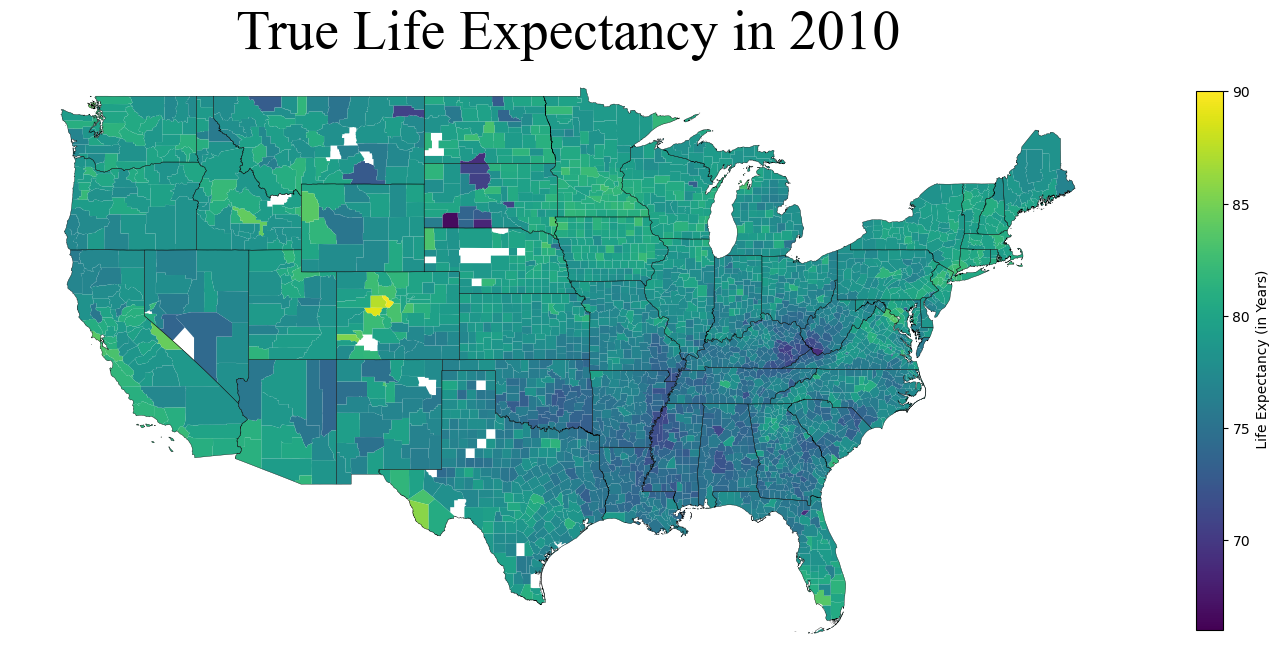

In [9]:
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax,column='MeanLifeExpectency', legend=True, legend_kwds={"label": " Life Expectancy (in Years)", 
                                                                               "shrink":0.50}, vmin=66, vmax=90)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('True Life Expectancy in 2010', **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

plt.show()

## Plot fraction of time temperature was above threshold

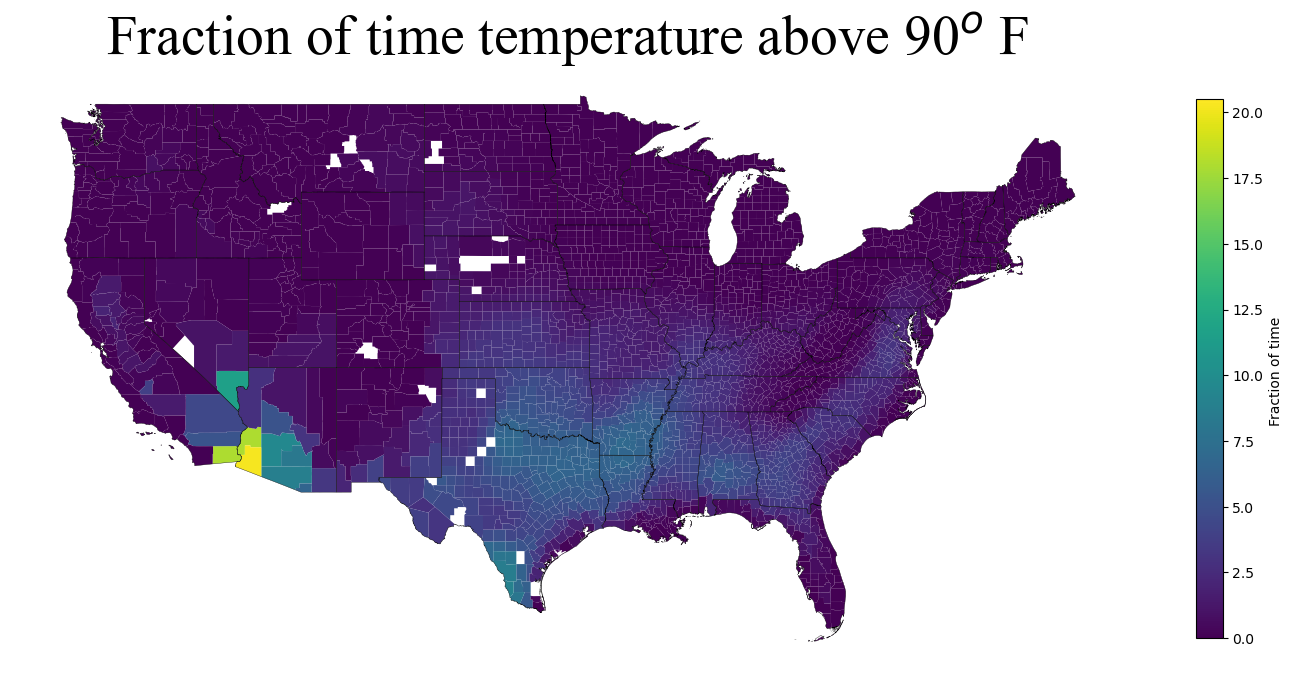

In [23]:
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax,column='Temp above threshold', legend=True, legend_kwds={"label": "Fraction of time ", 
                                                                               "shrink":0.50}, vmin=0, vmax=20.5)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('Fraction of time temperature above 90$^o$ F', **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

plt.show()

## Plot fraction of time below threshold

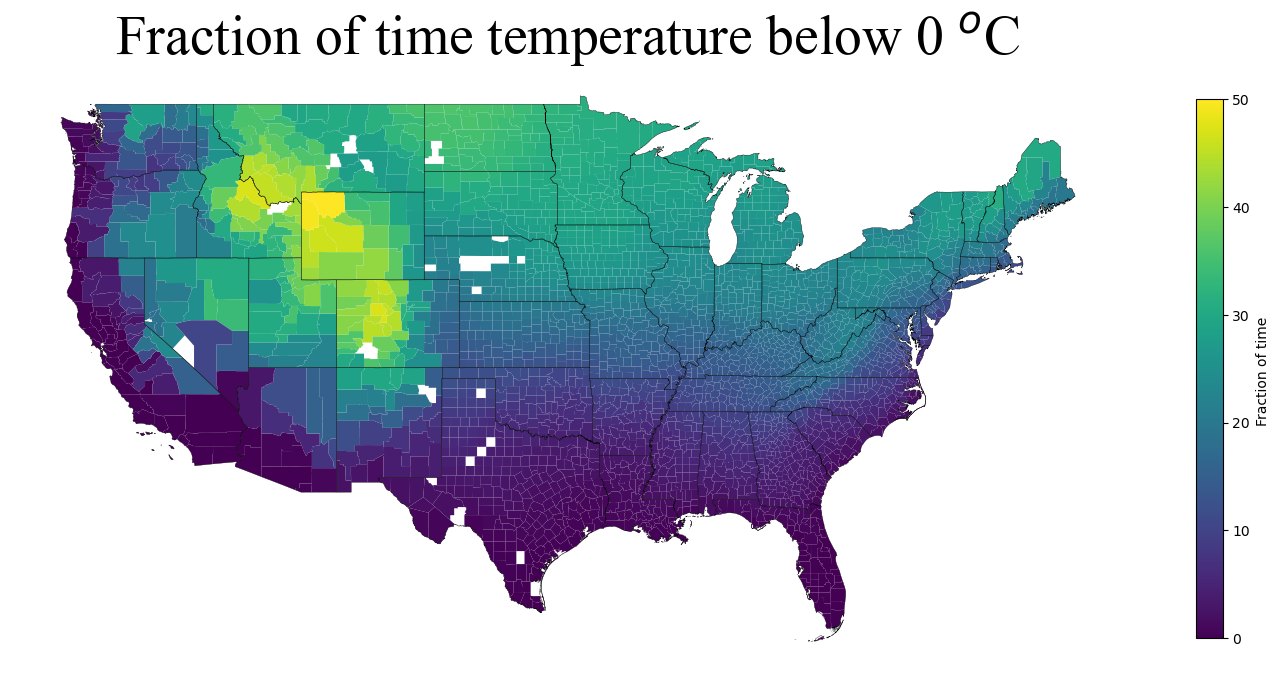

In [19]:
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax,column='Temp below threshold', legend=True, legend_kwds={"label": "Fraction of time ", 
                                                                               "shrink":0.50}, vmin=0, vmax=50)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('Fraction of time temperature below 0 $^o$C', **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

plt.show()

## Plot of fraction of time about PM2.5

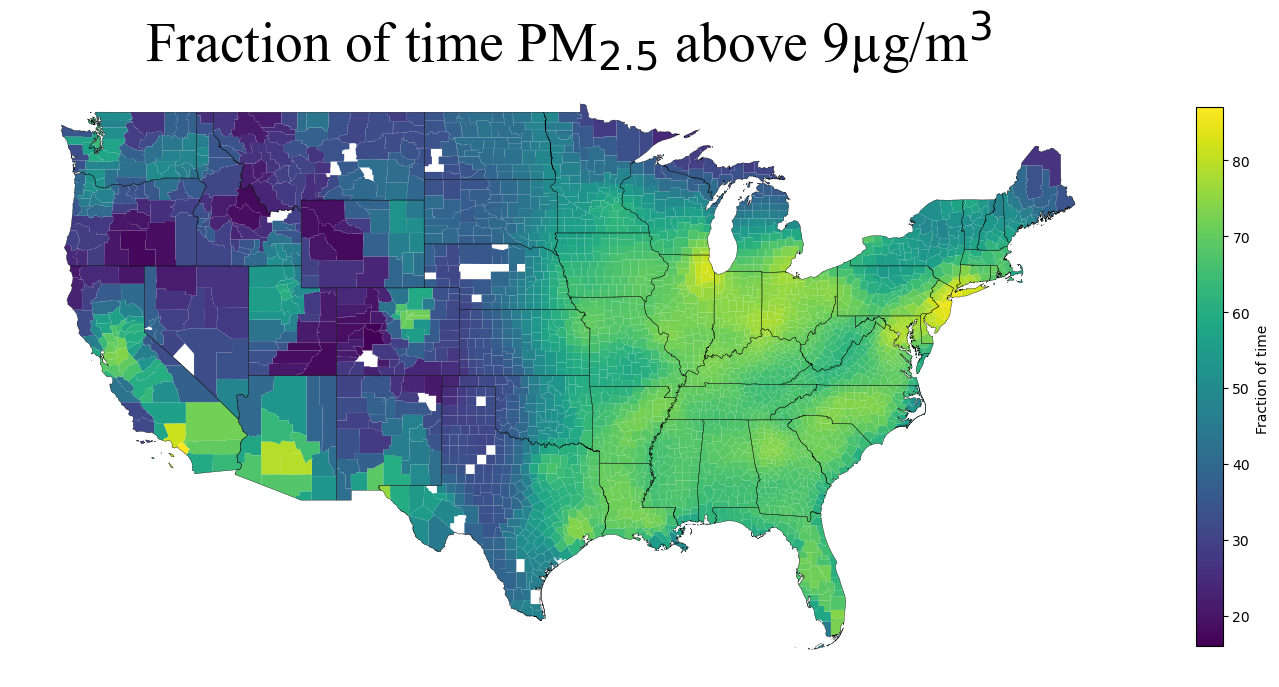

In [22]:
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax,column='PM2.5 above threshold', legend=True, legend_kwds={"label": "Fraction of time ", 
                                                                               "shrink":0.50}, vmin=16, vmax=87)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('Fraction of time PM$_{2.5}$ above 9\u00B5g/m$^3$', **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

plt.show()